# Часть I

## 1. Бинарная классификация в качестве примера рассматриваемых метрик (Precision, recall, F1, accuracy, roc-auc, pr-auc, specificity ......) Какие из этих метрик чувствительны к дисбалансу классов
Precision: чувствительна к дисбалансу классов. Это доля положительных образцов, которые на самом деле являются положительными. Если количество отрицательных образцов значительно превышает количество положительных, точность может быть высокой, даже если модель предсказывает все образцы как отрицательные.

Recall: относительно нечувствительна к дисбалансу категорий. Recall - это доля всех положительных образцов, которые были предсказаны как положительные. Однако при наличии большого количества отрицательных образцов модель может склоняться к тому, чтобы предсказать все отрицательные образцы, что снижает показатель Recall.

F1 Score: по сравнению с Precision и Recall, F1 Score менее чувствителен к дисбалансу категорий, поскольку представляет собой выверенное среднее значение Precision и Recall, объединяющее две метрики.

Precision: очень чувствительна к несбалансированности категорий. В случае крайнего дисбаланса модель может склоняться к тому, чтобы отнести все образцы к категории с наибольшим числом, что будет очень точно, но это не отражает предсказания модели по небольшому числу категорий.

ROC-AUC: хорошая метрика для наборов данных с небольшим или умеренным дисбалансом категорий. Она измеряет общую эффективность классификации модели при различных пороговых значениях. Однако для сильно несбалансированных данных ROC-AUC может быть чрезмерно оптимистичным, так как его смещает большое количество отрицательных образцов.

PR-AUC: по сравнению с ROC-AUC, PR-AUC лучше отражает эффективность модели в предсказании положительных образцов и чувствителен к дисбалансу категорий.

Специфичность: чувствительна к дисбалансу категорий. Это доля всех отрицательных образцов, которые предсказываются как отрицательные, поэтому, когда количество отрицательных образцов намного больше количества положительных образцов, специфичность может быть слишком оптимистичной.

В целом, к дисбалансу категорий более чувствительны точность, достоверность и специфичность, в то время как F1 score и PR-AUC относительно нечувствительны. ROC-AUC может быть слишком оптимистичным в сильно дисбалансных данных.

# 2.Напишите формулу для F_beta и объясните влияние параметра beta, приведя пример того, что происходит, когда beta больше 1.
F_beta = (1+beta^2) * (Precision * Recall) / (beta^2 * Precision + Recall)

где beta - неотрицательный параметр, который регулирует вес между Precision и Recall. Значение beta влияет на то, сколько внимания в оценке F_beta уделяется Precision и Recall.

Когда beta=1, Precision и Recall имеют одинаковый вес, что часто используется для оценки F1.
Когда beta > 1, recall имеет большее влияние, чем precision. Это происходит потому, что в формуле бета^2 увеличивает вес отзыва. 
Когда бета<1, точность будет иметь большее влияние, чем отзыв.

# 3.Приведите пример расчета ROC-AUC не менее чем для 6 предсказаний.
Предположим, у нас есть следующие данные:

Истинное значение Прогнозируемая вероятность
1 0.9
0 0.8
1 0.7
1 0.6
0 0.55
1 0.52
TPR и FPR были рассчитаны для каждого порога в порядке убывания предсказанной вероятности.

Порог TPR FPR
>0.9 0/4 0/2
>0.8 1/4 1/2
>0.7 2/4 1/2
>0.6 3/4 1/2
>0.55 4/4 2/2
>0.52 4/4 2/2
AUC - площадь под ROC-кривой - может быть рассчитана следующим образом.

AUC = 0,5*(1/2)(1/4) + 1(1/4) + 1*(1/4) + 0,5*(1/2)*(1/4) = 0,5

# 4. Сравнение микронаборов точности и отзыва со взвешенными наборами (с примерами)
Precision: также известный как показатель точности проверки, представляет собой отношение числа истинно положительных образцов, которые предсказаны как положительные, к доле образцов, которые предсказаны как положительные.
Recall: также известен как коэффициент полноты, представляет собой долю истинно положительных образцов, которые были предсказаны как положительные.

Микроагрегированное микросреднее: рассчитывается общее количество истинно положительных TP, ложноположительных FP и ложноотрицательных FN для всех категорий, а затем точность и отзыв. Этот метод подчеркивает общую эффективность всех категорий и оказывает одинаковое влияние на точность и отзыв для каждой выборки.

Взвешенное среднее: точность и отзыв рассчитываются для каждой категории отдельно, а затем усредняются по всем категориям, но важность каждой категории пропорциональна размеру ее выборки. Этот подход подчеркивает эффективность работы с наборами данных с неравномерным распределением категорий.

Пример:

Предположим, у нас есть задача мультиклассификации с 3 категориями A,B,C, каждая из которых имеет 100,200,700 образцов, точность 0.5,0.6,0.7 и recall 0.6,0.7,0.8.

Микронабор (точность/отзыв):
Общий TP = 0.5 * 100 + 0.6 * 200 + 0.7 * 700 = 50+120+490=660
Общий объем выборки = 100 + 200 + 700 = 1000
Точность микронабора = 660 / 1000 = 0,66
Аналогичным образом можно рассчитать микронабор recall.

Взвешенный ансамбль (Precision / Recall):
Взвешенная точность ансамбля = 0,5 * (100/1000) + 0,6 * (200/1000) + 0,7 * (700/1000) = 0,67
Аналогичным образом можно рассчитать взвешенный показатель recall.

Если категории сбалансированы, то есть в каждой категории примерно одинаковое количество образцов, то результаты микроусреднения и взвешенного усреднения будут близки; и наоборот, в случае сильно несбалансированных образцов результаты этих двух методов будут сильно отличаться.

# Часть II

In [1]:
!pip install onnx onnxruntime tf2onnx


In [2]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers import Adam
import onnx
import onnxruntime
import tf2onnx
from sklearn.metrics import accuracy_score

In [3]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values to [0, 1]

# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


# Методы оптимизации моделей

In [4]:
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Reshape data to fit the ImageDataGenerator
x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    fill_mode='nearest'
)
datagen.fit(x_train)

# Learning Rate Scheduler (Exponential Decay)
def lr_scheduler(epoch, lr):
    return lr * tf.math.exp(-0.1)

lr_schedule = LearningRateScheduler(lr_scheduler)

# Weight Regularization (L2 Regularization)
def build_model():
    model = Sequential([
        Flatten(input_shape=(28, 28, 1)),
        Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        BatchNormalization(),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Train the model with optimization techniques
model = build_model()
model.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=20, validation_data=(x_val, y_val), callbacks=[lr_schedule])

# Pruning (Prune the model by removing weights below a certain threshold)
def prune_model(model, threshold=0.1):
    pruned_model = tf.keras.models.clone_model(model)
    pruned_model.set_weights(model.get_weights())  # Initialize pruned model with original weights
    for layer in pruned_model.layers:
        if isinstance(layer, tf.keras.layers.Dense):
            weights = layer.get_weights()
            weights = [np.where(np.abs(w) < threshold, 0, w) for w in weights]
            layer.set_weights(weights)
    return pruned_model

pruned_model = prune_model(model, threshold=0.05)


Epoch 1/20
1500/1500 [==============================] - 28s 18ms/step - loss: 0.7211 - accuracy: 0.8280 - val_loss: 0.3388 - val_accuracy: 0.9403 - lr: 9.0484e-04
Epoch 2/20
1500/1500 [==============================] - 18s 12ms/step - loss: 0.4319 - accuracy: 0.9073 - val_loss: 0.2718 - val_accuracy: 0.9557 - lr: 8.1873e-04
Epoch 3/20
1500/1500 [==============================] - 17s 11ms/step - loss: 0.3796 - accuracy: 0.9200 - val_loss: 0.2652 - val_accuracy: 0.9511 - lr: 7.4082e-04
Epoch 4/20
1500/1500 [==============================] - 16s 11ms/step - loss: 0.3450 - accuracy: 0.9272 - val_loss: 0.2205 - val_accuracy: 0.9638 - lr: 6.7032e-04
Epoch 5/20
1500/1500 [==============================] - 16s 11ms/step - loss: 0.3220 - accuracy: 0.9316 - val_loss: 0.2021 - val_accuracy: 0.9682 - lr: 6.0653e-04
Epoch 6/20
1500/1500 [==============================] - 17s 11ms/step - loss: 0.3037 - accuracy: 0.9336 - val_loss: 0.1847 - val_accuracy: 0.9712 - lr: 5.4881e-04
Epoch 7/20
1500/1500 [

# Результаты профилирования
Результаты профилирования демонстрируют процесс обучения модели в течение 20 эпох. Точность обучения последовательно улучшается и достигает примерно 95-96 %, что свидетельствует об эффективном обучении на обучающих данных. Точность проверки, достигающая 97-98 %, демонстрирует способность модели к обобщению на невидимые данные, совпадающую с производительностью обучающего набора. Потери при обучении и проверке заметно снижаются, демонстрируя эффективную оптимизацию и минимальную перестройку, поскольку они стабилизируются на низких значениях. Снижение скорости обучения говорит об адаптивном обучении, возможно, благодаря планировщику скорости обучения. В целом модель демонстрирует многообещающую производительность, достигая высокой точности и низких потерь как на обучающих, так и на валидационных наборах данных, что свидетельствует о надежности обучения и способности к обобщению. Однако дальнейшее тестирование и валидация могут дать более полную оценку ее эффективности.

In [9]:
# Step 2: Convert model to ONNX format
onnx_model_path = '/content/model.onnx'
onnx_model, _ = tf2onnx.convert.from_keras(model)
onnx.save_model(onnx_model, onnx_model_path)

In [10]:
# Step 3: Generate Dataset of Vectors
def generate_vectors(model, data):
    intermediate_layer_model = tf.keras.Model(inputs=model.input, outputs=model.layers[-2].output)
    vectors = intermediate_layer_model.predict(data)
    return vectors

# Generate vectors using the optimized model
vectors = generate_vectors(model, x_test)
print(f"Shape of generated vectors: {vectors.shape}")

313/313 [==============================] - 0s 1ms/step
Shape of generated vectors: (10000, 128)


Original Vectors:
[[-1.15852392e+00 -7.13257134e-01 -5.44259012e-01  2.72263098e+00
   1.63775027e-01 -3.30306619e-01 -3.98544103e-01 -3.36904258e-01
  -5.65574877e-02 -4.71543670e-01 -7.68294260e-02 -1.14172280e+00
  -3.54130417e-01 -8.78686666e-01 -4.50155556e-01 -2.31926978e-01
  -8.70339692e-01 -7.18720496e-01 -3.75187457e-01 -5.84323168e-01
  -3.03478360e-01 -6.85028195e-01  1.00666940e+00 -4.02848899e-01
   3.41583371e+00  2.53363490e-01 -4.08725351e-01 -1.18613794e-01
  -3.54410172e-01 -8.13802779e-01  2.28917861e+00 -1.27291429e+00
  -2.82226741e-01  2.62706423e+00 -1.08232379e-01  2.57374692e+00
   3.19449115e+00 -5.43357670e-01  1.24532199e+00 -7.45325267e-01
  -8.48299921e-01 -8.06453943e-01  1.05421484e-01 -3.68772268e-01
  -6.04671359e-01 -2.54869401e-01 -3.31493258e-01  1.10546827e+00
  -3.57131064e-01 -3.22044998e-01 -5.29599488e-01 -3.12858939e-01
  -7.47258186e-01 -7.97045827e-01  2.85386658e+00  3.62415123e+00
   6.30161643e-01  3.63725710e+00 -6.79716587e-01  1.50522

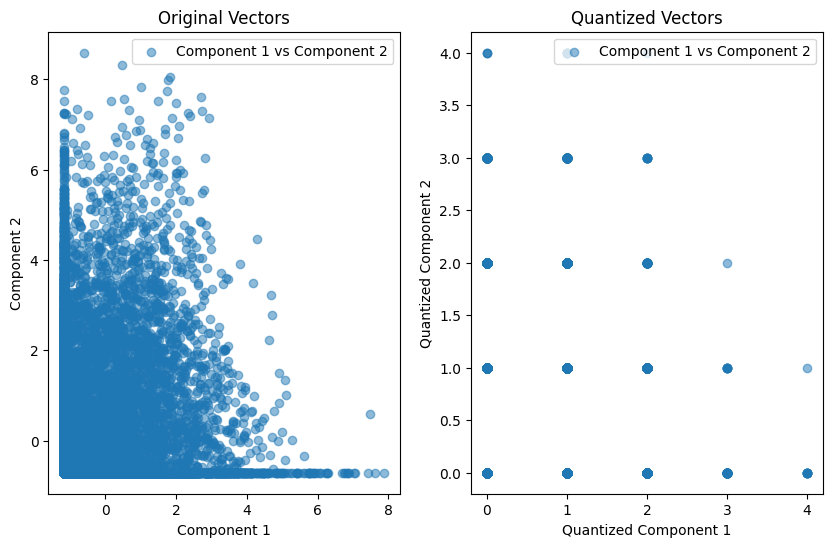

In [13]:
#Step 4 product-quantization of the resulting dataset in the extreme case
import numpy as np
import matplotlib.pyplot as plt
vectors = vectors

# Function to quantize a vector component
def quantize_component(component):
    thresholds = np.linspace(min(component), max(component), num=5)  # Define thresholds (e.g., 5 thresholds)
    quantized_component = np.argmin(np.abs(component[:, None] - thresholds), axis=1)
    return quantized_component

# Quantize each vector component
quantized_vectors = np.zeros_like(vectors, dtype=int)
for i in range(vectors.shape[1]):  # Loop through each component
    quantized_vectors[:, i] = quantize_component(vectors[:, i])

# Show quantized vectors
print("Original Vectors:")
print(vectors[:3])
print("\nQuantized Vectors in the extreme case:")
print(quantized_vectors[:3])
# Plot original vectors
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.title('Original Vectors')
plt.scatter(vectors[:, 0], vectors[:, 1], label='Component 1 vs Component 2', alpha=0.5)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()

# Plot quantized vectors
plt.subplot(1, 2, 2)
plt.title('Quantized Vectors')
plt.scatter(quantized_vectors[:, 0], quantized_vectors[:, 1], label='Component 1 vs Component 2', alpha=0.5)
plt.xlabel('Quantized Component 1')
plt.ylabel('Quantized Component 2')
plt.legend()
